In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Kobe Bryant  shot selection

Cсылка на соревнование: https://www.kaggle.com/c/kobe-bryant-shot-selection

Goal: Fun and education

Using 20 years of data on Kobe's swishes and misses, can you predict which shots will find the bottom of the net? This competition is well suited for practicing classification basics, feature engineering, and time series analysis. Practice got Kobe an eight-figure contract and 5 championship rings. What will it get you?

This data contains the location and circumstances of every field goal attempted by Kobe Bryant took during his 20-year career. Your task is to predict whether the basket went in (shot_made_flag).

We have removed 5000 of the shot_made_flags (represented as missing values in the csv file). These are the test set shots for which you must submit a prediction. You are provided a sample submission file with the correct shot_ids needed for a valid prediction.

In [2]:
data = pd.read_csv('data/Kobe.csv')

In [3]:
data.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [4]:
target = 'shot_made_flag'

**Задания:**

1. Провести анализ данных. Много хороших примеров анализа можно посмотреть здесь https://www.kaggle.com/c/kobe-bryant-shot-selection/kernels
2. Подготовить фичи для обучения модели - нагенерить признаков, обработать пропущенные значения, проверить на возможные выбросы, обработать категориальные признаки и др.
3. Обучить линейную модель, Lasso, Ridge на тех же признаках - построить сравнительную таблицу коэффициентов, сделать заключения о том, как меняется величина коэффициентов, какие зануляются. Посчитать RSS

**Дополнительно**
4. Сравнить результаты на тестовом наборе данных - сделать train_test_split в самом начале, подготовить переменные, сравнить результаты работы классификаторов (те же 3), метрика ROC AUC

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

In [8]:
#проверить нормальность распределения данных (построить box plot и посмотреть, много ли outliers)
#смотрим, в какой период времени игры он делает попытку броска, в секундах + то же самое, но для попаданий
# процент попаданий из зон площадки, дистанции и тд


# построить колонки: seconds_left, home (1/0), разбить на столбцы положение игрока (binning, можно посмотреть на графике, сколько лучше сделать столбцов) + день,месяц,год иг
#удалить ненужные колонки 'team_id', 'lat', 'lon', 'game_id', 'team_name', 'game_event_id', 'shot_made_flag'
#заменить незначительные категории
#построить булевы переменные

#обучить 3 модели

In [67]:
for col in ['period','playoffs', 'season', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'matchup']:
    print(col, data[col].unique())

period [1 2 3 4 5 6 7]
playoffs [0 1]
season ['2000-01' '2001-02' '2002-03' '2003-04' '2004-05' '2005-06' '2006-07'
 '2007-08' '2008-09' '2009-10' '2010-11' '2011-12' '2012-13' '2013-14'
 '2014-15' '2015-16' '1996-97' '1997-98' '1998-99' '1999-00']
shot_zone_area ['Right Side(R)' 'Left Side(L)' 'Left Side Center(LC)'
 'Right Side Center(RC)' 'Center(C)' 'Back Court(BC)']
shot_zone_basic ['Mid-Range' 'Restricted Area' 'In The Paint (Non-RA)' 'Above the Break 3'
 'Right Corner 3' 'Backcourt' 'Left Corner 3']
shot_zone_range ['16-24 ft.' '8-16 ft.' 'Less Than 8 ft.' '24+ ft.' 'Back Court Shot']
matchup ['LAL @ POR' 'LAL vs. UTA' 'LAL @ VAN' 'LAL vs. LAC' 'LAL @ HOU'
 'LAL @ SAS' 'LAL vs. HOU' 'LAL vs. DEN' 'LAL @ SAC' 'LAL @ DEN'
 'LAL vs. CHI' 'LAL vs. GSW' 'LAL vs. MIN' 'LAL @ LAC' 'LAL vs. IND'
 'LAL @ SEA' 'LAL vs. SAS' 'LAL vs. DAL' 'LAL vs. PHI' 'LAL @ GSW'
 'LAL vs. SEA' 'LAL vs. DET' 'LAL vs. MIL' 'LAL vs. VAN' 'LAL @ TOR'
 'LAL @ MIA' 'LAL @ DAL' 'LAL vs. POR' 'LAL @ PHX' 'LAL vs

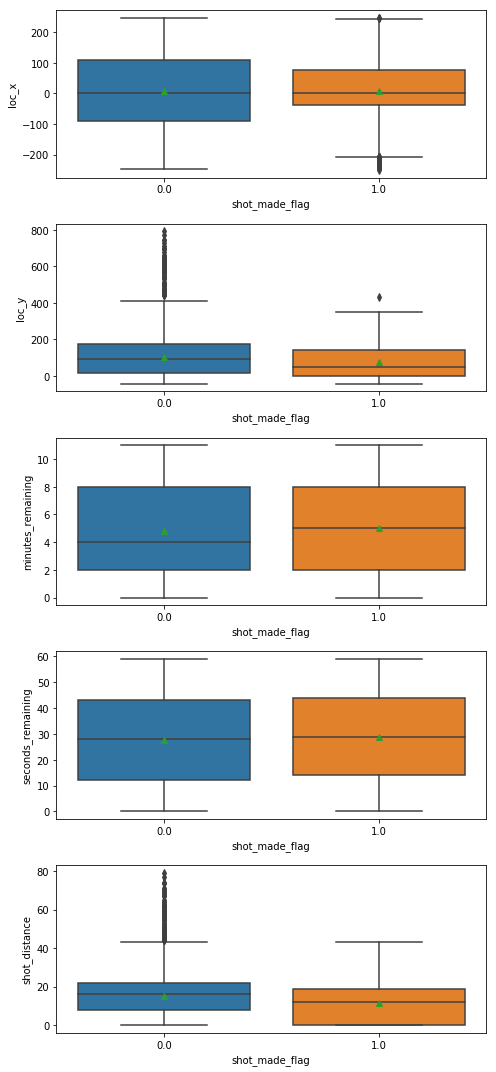

In [33]:

import seaborn as sns
cols = ['loc_x', 'loc_y', 'minutes_remaining', 'seconds_remaining', 'shot_distance']
f, axarr = plt.subplots(5,1,figsize=(7,15))
num = 0
for col in cols:
    sns.boxplot(x='shot_made_flag', y=col, data=data, showmeans=True, ax=axarr[num])
    num+=1
plt.tight_layout()
plt.show()

In [74]:
def count_seconds(inp):
    if inp['period'] < 5:
        return (inp['period']-1)*12*60 + 12*60 - (inp['seconds_remaining'] + inp['minutes_remaining']*60)
    if inp['period'] > 5:
        return 4*12*60 + (inp['period']-1)*3*5 + 3*5 - (inp['seconds_remaining'] + inp['minutes_remaining']*60)


data['seconds_from_start'] = data.apply(count_seconds, axis = 1)
data.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,seconds_from_start
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1,93.0
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2,98.0
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3,255.0
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4,308.0
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5,1061.0


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


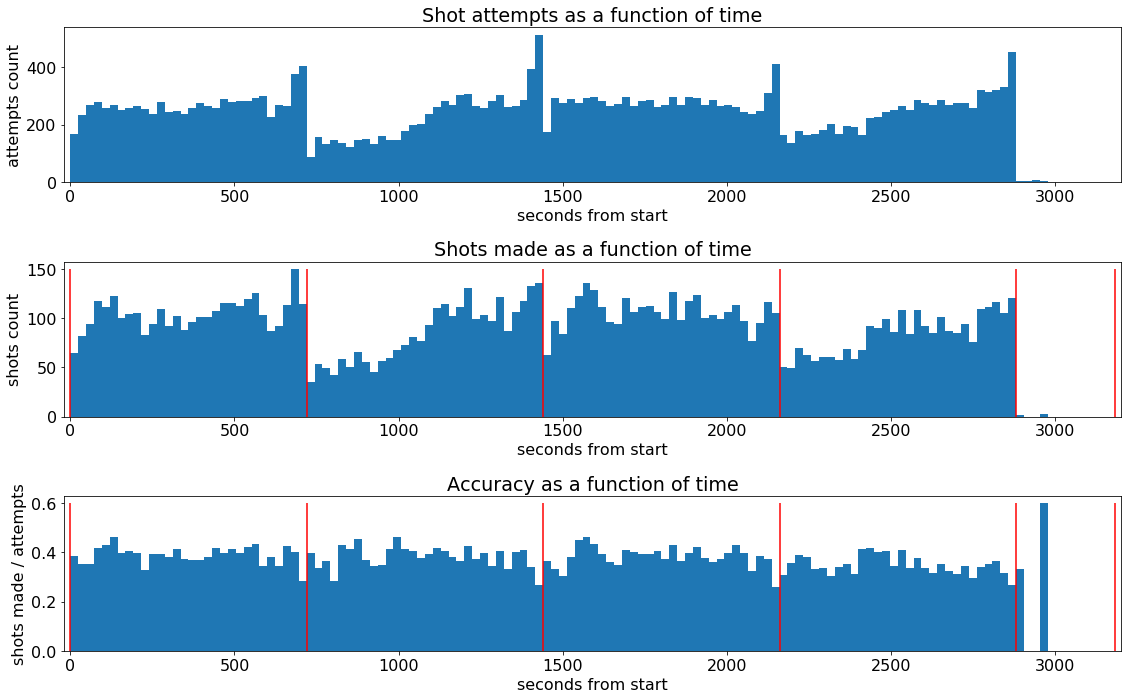

In [171]:
plt.rcParams['figure.figsize'] = (16,10)
plt.rcParams['font.size'] = 16

binsSizes = [24]

plt.figure()

timeBins = np.arange(0,60*(4*12+3*5),binsSizes[0])+0.01
attemptsAsFunctionOfTime, b = np.histogram(data['seconds_from_start'], bins=timeBins)
plt.subplot(3,1,1)
plt.vlines(x=[0,12*60,2*12*60,3*12*60,4*12*60,4*12*60+5*60,4*12*60+2*5*60,4*12*60+3*5*60], ymin=0,ymax=maxHeight, colors='red')
plt.bar(timeBins[:-1],attemptsAsFunctionOfTime, align='edge', width=binsSizes[0])
plt.xlim((-20,3200))
plt.ylabel('attempts count')
plt.xlabel('seconds from start')
plt.title('Shot attempts as a function of time')


shotsMadeAsFunctionOfTime, b = np.histogram(data[data.shot_made_flag == 1].seconds_from_start, bins=timeBins)
plt.subplot(3,1,2)
plt.bar(timeBins[:-1],shotsMadeAsFunctionOfTime, align='edge', width=binsSizes[0])
maxHeight = max(shotsMadeAsFunctionOfTime)
plt.vlines(x=[0,12*60,2*12*60,3*12*60,4*12*60,4*12*60+5*60,4*12*60+2*5*60,4*12*60+3*5*60], ymin=0,ymax=maxHeight, colors='red')
plt.xlim((-20,3200))
plt.ylabel('shots count')
plt.xlabel('seconds from start')
plt.title('Shots made as a function of time')


plt.subplot(3,1,3)
plt.bar(timeBins[:-1],shotsMadeAsFunctionOfTime / attemptsAsFunctionOfTime, align='edge', width=binsSizes[0])
maxHeight = max(shotsMadeAsFunctionOfTime / attemptsAsFunctionOfTime)
plt.vlines(x=[0,12*60,2*12*60,3*12*60,4*12*60,4*12*60+5*60,4*12*60+2*5*60,4*12*60+3*5*60], ymin=0,ymax=maxHeight, colors='red')
plt.xlim((-20,3200))
plt.ylabel('shots made / attempts')
plt.xlabel('seconds from start')
plt.title('Accuracy as a function of time')

plt.tight_layout()



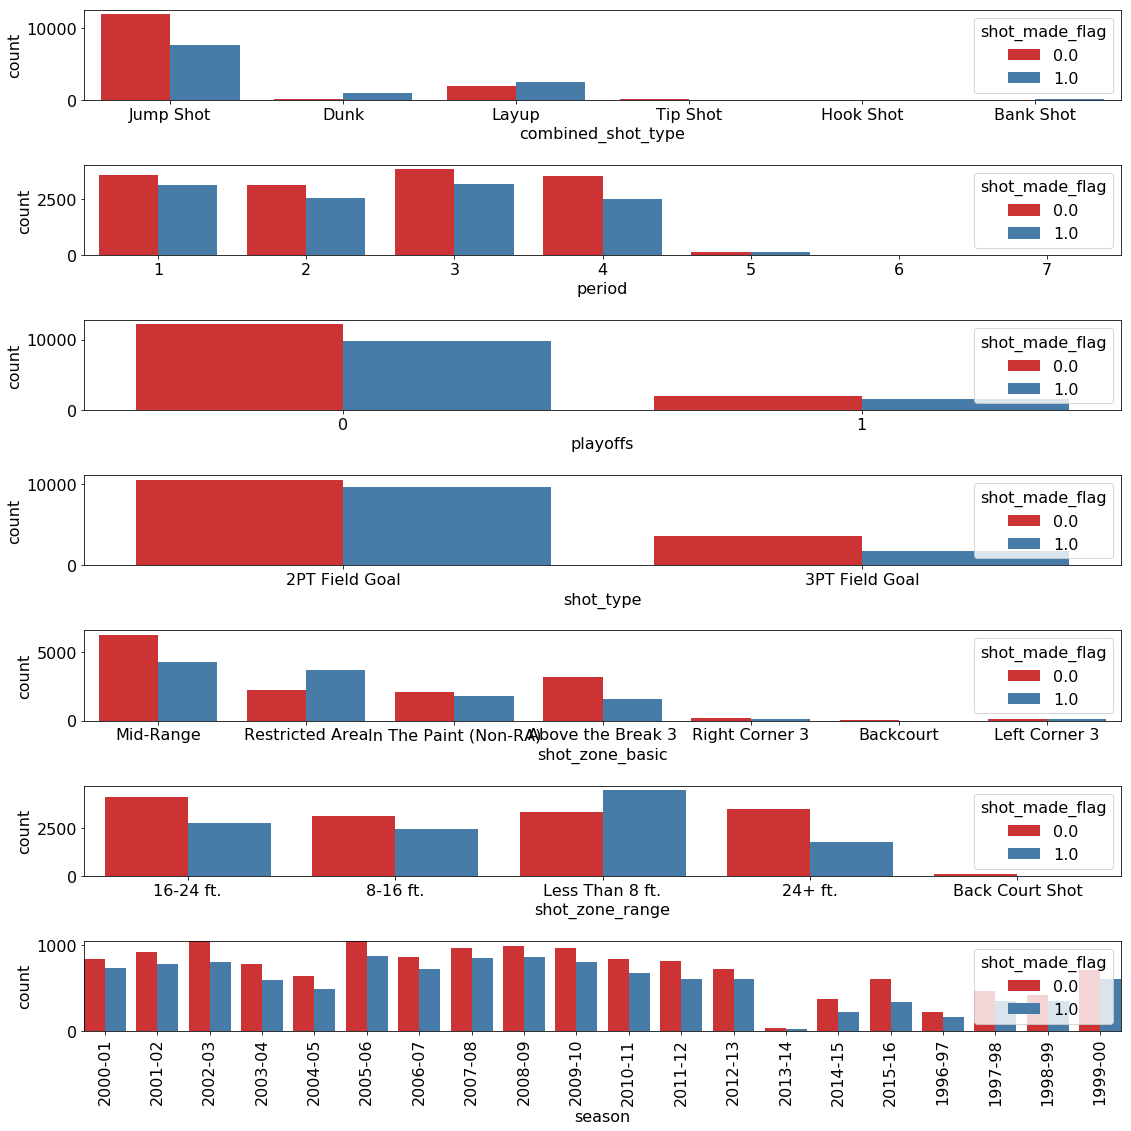

In [153]:
plt.rcParams['figure.figsize'] = (16, 16)
cols = ["combined_shot_type", "period", "playoffs", "shot_type", "shot_zone_basic", "shot_zone_range", "season"]
f, axarr = plt.subplots(len(cols),1)
num = 0
for col in cols:
    sns.countplot(x=col, hue='shot_made_flag', data=data, ax=axarr[num], palette="Set1")
    num+=1
    if col == "season": 
        plt.xticks(rotation=90)

plt.tight_layout()
plt.autoscale(tight=True)
plt.show()

In [5]:
train = data[~data.shot_made_flag.isnull()]


In [6]:
for col in ['team_id', 'lat', 'lon', 'game_id', 'team_name', 'game_event_id']:
    train.drop(col, axis = 1, inplace = True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [8]:
def home_away(inp):
    if '@' in inp['matchup']:
        return 1
    else: return 0

train['home_away'] = train.apply(home_away, axis = 1)
train['game_date'] = pd.to_datetime(train['game_date'])
train['game_year'] = train['game_date'].dt.year
train['game_month'] = train['game_date'].dt.month
    
train['loc_x'] = pd.cut(train['loc_x'], 25)
train['loc_y'] = pd.cut(train['loc_y'], 25)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#index

In [9]:
for col in ['matchup', 'minutes_remaining', 'seconds_remaining']:
    train.drop(col, axis = 1, inplace = True)


/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [10]:
train.drop('game_date', axis=1, inplace=True)
train.drop('shot_id', axis=1, inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [11]:
cols = 'action_type, combined_shot_type, loc_x, loc_y, season, shot_type, shot_zone_area, shot_zone_basic, shot_zone_range, opponent'.split(', ')
for col in cols:
    dummy = pd.get_dummies(train[col]).add_prefix('{}_'.format(col))
    train = train.join(dummy)
    train.drop(col, axis=1, inplace=True)

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Columns: 191 entries, period to opponent_WAS
dtypes: float64(1), int64(6), uint8(184)
memory usage: 7.3 MB


In [12]:
cols_renamed = []
i = 0
for col in train.columns.values:
    i = i + 1
    if 'loc' in col:
        cols_renamed.append('loc_'+str(i))
        continue
    cols_renamed.append(col)


In [13]:
train.columns = cols_renamed

In [14]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [15]:
cols = list(train.columns.values)
cols.remove('shot_made_flag')
x = train[cols].as_matrix()
y = train['shot_made_flag']
x

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[ 1,  0, 15, ...,  0,  0,  0],
       [ 1,  0, 16, ...,  0,  0,  0],
       [ 1,  0, 22, ...,  0,  0,  0],
       ...,
       [ 4,  1, 21, ...,  0,  0,  0],
       [ 4,  1, 26, ...,  0,  0,  0],
       [ 4,  1,  7, ...,  0,  0,  0]])

In [16]:
linear = LinearRegression().fit(x,y)
print(linear.intercept_)
print(linear.coef_)
print(linear.score(x,y))

-68434436498.66641
[-1.23701082e-02  7.91537738e-03  4.83505625e-03 -9.56663817e-03
 -5.26775615e-02 -5.34117215e-03  6.94406878e+08  8.50613566e+07
  8.50613566e+07 -6.02673369e+08  6.94406878e+08  8.50613567e+07
  8.50613567e+07 -8.03041480e+08 -8.03041481e+08  2.09911314e+09
 -8.03041481e+08  8.50613566e+07  8.50613566e+07  6.94406878e+08
  6.94406878e+08 -8.03041480e+08 -8.03041481e+08  8.50613567e+07
  8.50613563e+07 -8.03041480e+08  6.94406878e+08 -6.02673368e+08
  2.09911314e+09 -8.03041480e+08 -8.03041480e+08 -8.03041481e+08
  8.50613562e+07 -6.02673369e+08 -8.03041480e+08  6.94406878e+08
  8.50613565e+07  6.94406877e+08  6.94406878e+08  8.50613565e+07
  6.94406878e+08 -6.02673368e+08  6.94406878e+08  8.50613565e+07
  8.50613561e+07  2.09911314e+09 -8.03041480e+08  8.50613566e+07
 -8.03041480e+08  8.50613564e+07  6.94406878e+08  2.15908197e+09
  6.94406878e+08 -8.03041481e+08  8.50613565e+07  2.15908197e+09
 -6.02673368e+08 -8.03041481e+08  8.50613568e+07  2.09911314e+09
 -8.03

In [17]:
linear = Ridge().fit(x,y)
print(linear.intercept_)
print(linear.coef_)
print(linear.score(x,y))

31.12174951640395
[-1.23407561e-02 -2.61114954e-03  3.20040112e-03 -9.60661762e-03
 -1.52426574e-02 -1.45154325e-03  6.42953988e-02  2.80487358e-02
  1.03627030e-01 -7.03113405e-02  1.03983844e-01  2.04984726e-01
  1.72286038e-01  2.36860365e-01 -1.54009744e-01  4.98748483e-02
 -1.93920508e-01  6.25183331e-02  9.50508721e-02  1.09638753e-01
 -9.38174673e-02  2.48724270e-01 -9.60833190e-02  1.48355588e-01
 -1.99027301e-01  7.76871377e-02  3.05815489e-02  2.14063690e-01
 -2.46785904e-01  1.32060926e-01  9.89879481e-02 -3.68210666e-01
 -2.94794688e-01 -1.71469897e-01  6.31248080e-02 -1.52659024e-01
 -1.12377802e-04 -2.88210056e-01  3.77235684e-02 -4.37641455e-02
  1.35361075e-01  9.05165361e-02  3.07542317e-02 -5.05780702e-02
 -3.46334509e-01  2.55111607e-01  7.48218042e-02  3.96927849e-02
  5.54110889e-02 -9.38554886e-02  1.04081006e-01 -2.20328765e-01
  1.04880190e-01 -3.35504245e-02 -2.73530386e-02 -5.78269977e-02
  5.07700566e-02 -6.19095130e-02  1.97600119e-01 -8.00874573e-02
 -7.647

In [18]:
linear = Lasso().fit(x,y)
print(linear.intercept_)
print(linear.coef_)
print(linear.score(x,y))

0.44616103047048294
[-0. -0. -0. -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0. -0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.  0.
  0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0.  0.  0.  0. -0. -0. -0.
  0.  0.  0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0. -0. -0.
 -0. -0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.
 -0.  0.  0. -0.  0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0.  0. -0. -0.
  0.  0.  0.  0. -0.  0.  0. -0.  0. -0.]
0.0


In [19]:

#разбиваем данные на test, train
from sklearn.model_selection import train_test_split

y = train['shot_made_flag'].copy()
data_train, data_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=42)


In [30]:

#выбираем колонки для обучения 

x_train = data_train
x_test = data_test
'shot_made_flag' in x_train.columns.values

True

In [33]:
x_train.drop(labels='shot_made_flag', axis = 1, inplace = True)
x_test.drop(labels='shot_made_flag', axis = 1, inplace = True)
'shot_made_flag' in x_train.columns.values

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


False

In [34]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier


In [35]:
import xgboost
from sklearn.metrics import roc_auc_score, roc_curve
xgb = xgboost.XGBClassifier(max_depth=5, n_jobs=-1)

xgb.fit(x_train, y_train)
y_train_predict = xgb.predict_proba(x_train)[:, 1]
y_test_predict = xgb.predict_proba(x_test)[:, 1]
roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 2)
roc_auc_test = np.round(roc_auc_score(y_test, y_test_predict), 2)
print("Train: ", roc_auc_train)
print("Test: ", roc_auc_test)

Train:  0.75
Test:  0.7


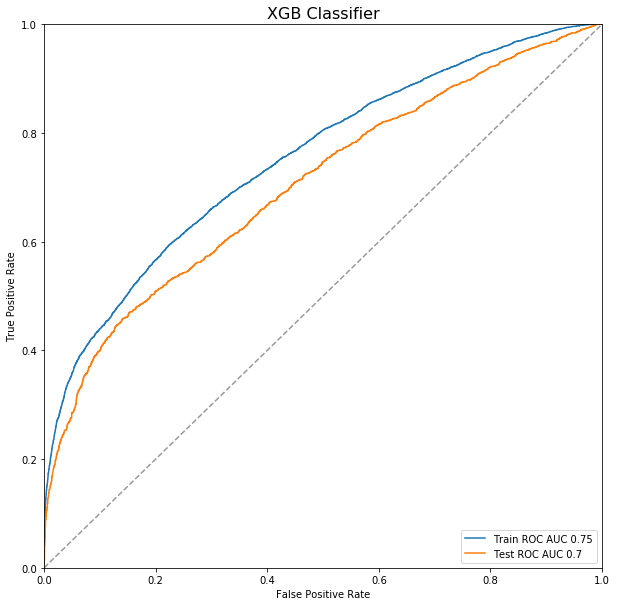

In [36]:
import matplotlib
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_predict)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_predict)

matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC AUC {0}'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGB Classifier', size=16)
plt.legend(loc='lower right')
plt.show()

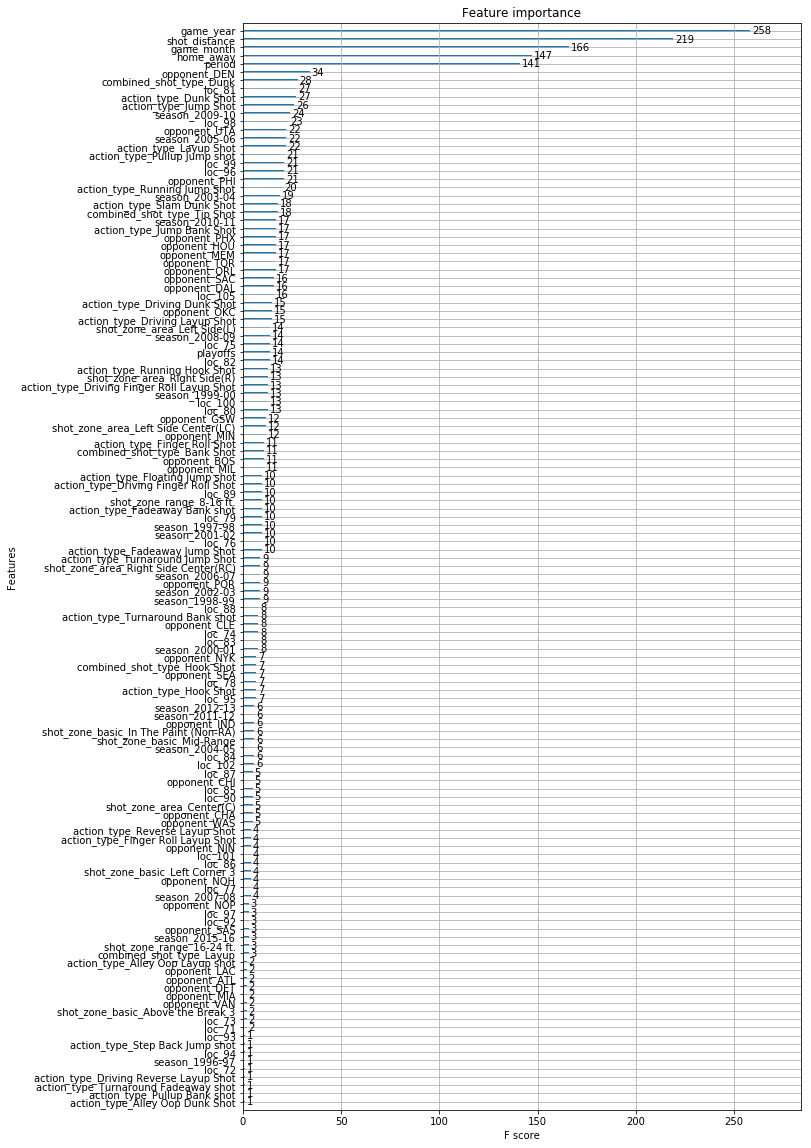

In [38]:
matplotlib.rcParams['figure.figsize'] = (10, 20)
xgboost.plot_importance(booster=xgb)
plt.savefig('tree_importance_test1.png')